Text(0.5, 1.0, 'Spectral Clustering')

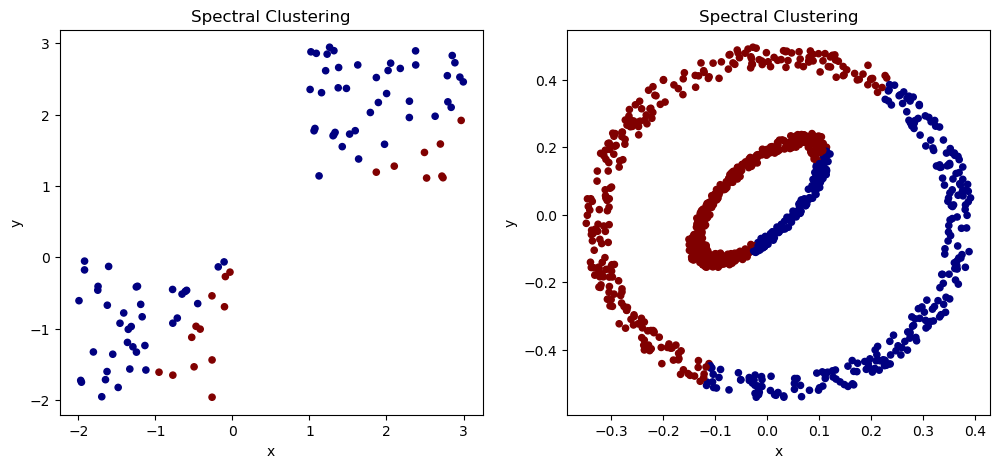

In [1]:
from lib.spectral_clustering import SpectralClustering
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_folder = 'data/'
square_df = pd.read_csv(data_folder + 'square.txt', names=['x', 'y'], sep=' ')
elliptical_df = pd.read_csv(data_folder + 'elliptical.txt', names=['x', 'y'], sep=' ')

sc1 = SpectralClustering(k=2,data=square_df.to_numpy(),similarity='cosine')
sc2 = SpectralClustering(k=2,data=elliptical_df.to_numpy(),similarity='cosine')
result1 = sc1.run(normalize=False)
result2 = sc2.run(normalize=False)

labels1 = result1.labels
labels2 = result2.labels

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
square_df.plot.scatter(x='x',y='y',c=labels1,colormap='jet',ax=ax1)
ax1.set_title('Spectral Clustering')
elliptical_df.plot.scatter(x='x',y='y',c=labels2,colormap='jet',ax=ax2)
ax2.set_title('Spectral Clustering')

Text(0.5, 1.0, 'Spectral Clustering')

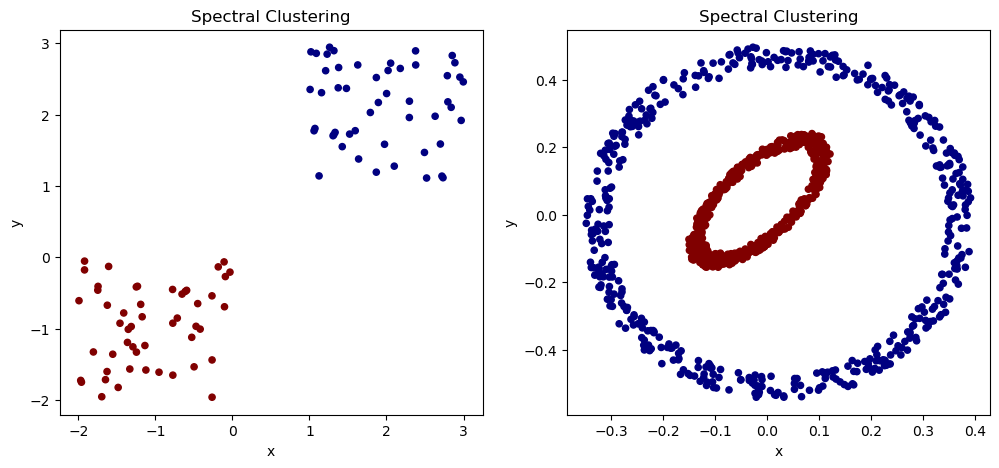

In [2]:
sc1 = SpectralClustering(k=2,data=square_df.to_numpy(),similarity='gaussian', sigma=1)
sc2 = SpectralClustering(k=2,data=elliptical_df.to_numpy(),similarity='gaussian', sigma=0.01)
result1 = sc1.run(normalize=False)
result2 = sc2.run(normalize=False)

labels1 = result1.labels
labels2 = result2.labels

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
square_df.plot.scatter(x='x',y='y',c=labels1,colormap='jet',ax=ax1)
ax1.set_title('Spectral Clustering')
elliptical_df.plot.scatter(x='x',y='y',c=labels2,colormap='jet',ax=ax2)
ax2.set_title('Spectral Clustering')


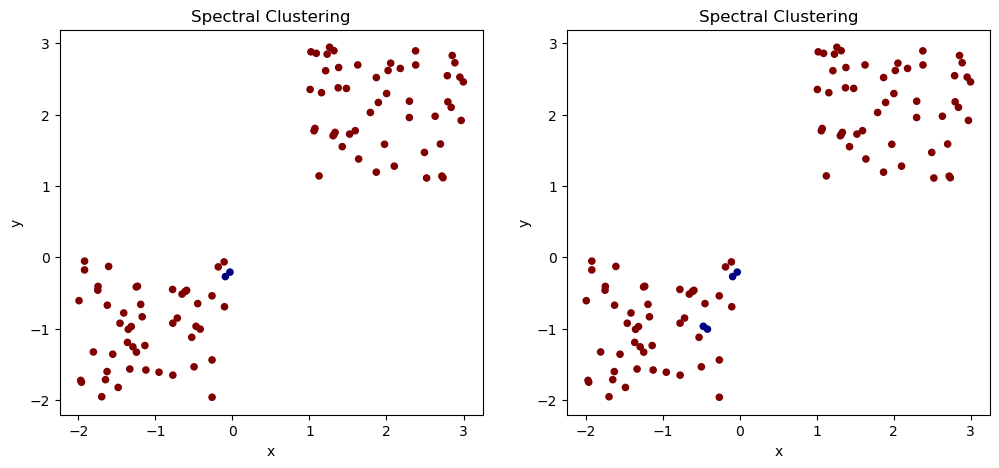

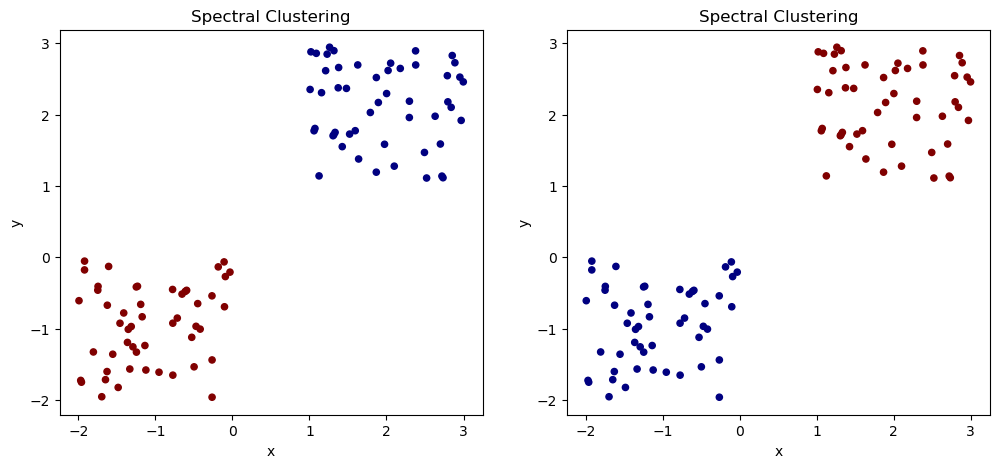

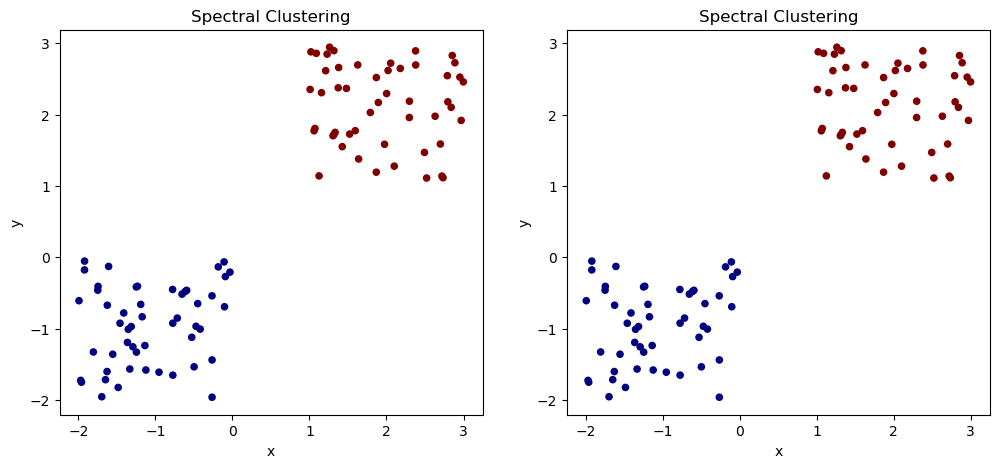

In [3]:

for sigma in [0.01, 0.1, 1]:
    sc1 = SpectralClustering(k=2,data=elliptical_df.to_numpy(),similarity='gaussian', sigma=sigma)
    sc2 = SpectralClustering(k=2,data=elliptical_df.to_numpy(),similarity='gaussian', sigma=sigma)
    result1 = sc1.run(normalize=True)
    result2 = sc2.run(normalize=False)

    labels1 = result1.labels
    labels2 = result2.labels

    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    elliptical_df.plot.scatter(x='x',y='y',c=labels1,colormap='jet',ax=ax1)
    ax1.set_title('Spectral Clustering')
    elliptical_df.plot.scatter(x='x',y='y',c=labels2,colormap='jet',ax=ax2)
    ax2.set_title('Spectral Clustering')